In [39]:
# import libraries
import pandas as pd
import panel as pn
pn.extension('plotly')
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [40]:
# Read Mapbox API Key
load_dotenv()
mapbox_api = os.getenv("mapbox")
px.set_mapbox_access_token(mapbox_api)

In [41]:
# Import Florida Median Home Prices CSV to Panda Dataframes
file_path = Path("Florida-Median-Home-Prices-By-County-Q1-2021.csv")
re_data = pd.read_csv(file_path)

In [42]:
re_data.head()

,County,Median Home Price Q1 2021
0,Alachua County,"$237,288"
1,Baker County,"$151,241"
2,Bay County,"$220,032"
3,Bradford County,"$120,402"
4,Bevard County,"$252,790"


In [43]:
re_data[re_data.columns[1:]] = re_data[re_data.columns[1:]].replace('[\$,]', '', regex=True).astype(float)

In [46]:
re_data.sort_values("Median Home Price Q1 2021")

,County,Median Home Price Q1 2021
36,Liberty County,81608.0
19,Glades County,83347.0
13,Dixie County,85303.0
21,Hamilton County,87041.0
22,Hardee County,90627.0
...,...,...
40,Martin County,340082.0
41,Miami-Dade County,360149.0
53,St. Johns County,368792.0
10,Collier County,401446.0


In [47]:
re_data_sorted_by_median_home_price = re_data.sort_values("Median Home Price Q1 2021")

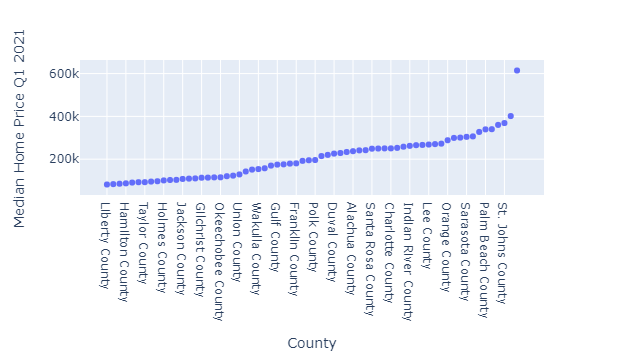

In [48]:
px.scatter(re_data_sorted_by_median_home_price, x="County", y="Median Home Price Q1 2021")

In [49]:
# Import Lat Long CSV to Panda Dataframes
file_path = Path("lat_long.csv")
lat_long_data = pd.read_csv(file_path)

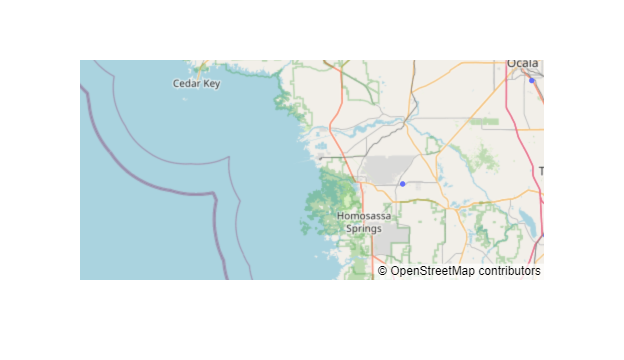

In [56]:
fl_county_map = px.scatter_mapbox(
    lat_long_data,
    lat="Lat",
    lon="Long"
)
fl_county_map.update_layout(mapbox_style="open-street-map")
fl_county_map.show()